<a href="https://colab.research.google.com/github/MxD-lab/SNN_Simulation/blob/neralnetwork/neralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy 



In [12]:
#シグモイド関数（出力層）
def sigmoid(x):
  return 1/(1+np.exp(-x))

#ReLU関数（隠れ層）
def relu(x):
  return np.maximum(0,x)

In [13]:
#交差エントロピー誤差

def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
  
  batch_size = y.shape[0]#yの行数
  return np.sum(-t*np.log(y)-(1-t)*np.log(1-y))/batch_size


  
  

In [14]:
"""
重み、バイアス、初期設定
W1：隠れ層の重み
B1:隠れ層のバイアス
W2:出力層の重み
B2:隠れ層のバイアス
"""

W1 = np.random.rand(2,2)
B1 = np.random.rand(2)
W2 = np.random.rand(2,1)
B2 = np.random.rand(1)
#print(W1)

In [15]:
#活性化関数の微分(relu)u:隠れ層の活性

def relu_diff(u):
  d = np.zeros_like(u) #xと同じ形状の配列を作成
  for i in range(len(u)):
    for j in range(len(u[0])):
      if u[i][j]>0:
        d[i][j] = 1
      else: 
        d[i][j] = 0

  return d

"""
def relu_diff(u):
  d = np.where( x > 0, 1, 0)
  return y
"""

'\ndef relu_diff(u):\n  d = np.where( x > 0, 1, 0)\n  return y\n'

In [16]:
#隠れ層の誤差
"""
delta:一個前の誤差（出力層の誤差）
w:一個前の重み（出力層の重み）
activ:活性化関数の微分
"""
def hidden_delta(delta,w,activ):
  d = np.zeros((4,2)) #データ数×隠れ層のニューロン数の配列を作成
  #d = np.zeros((int(delta),int(w[0])))
  for i in range(len(delta)):
    for j in range(len(w[0])):
      d[i][j] = delta[i]*w[j]*activ[i][j]
  return np.array(d)
  

In [17]:
"""
for i in range(100):#Nout
  for j in range(100):#Nin
    tmp = alpha*W2*N
    m_deltaX_accum(i,j) = beta1*m_deltaX_accum(i,j) + beta1coef * (deltaX_accum(i,j) + tmp)
    v_deltaX_accum(i, j) = beta2 * v_deltaX_accum(i, j) + beta2coef * (deltaX_accum(i, j) + tmp) * (deltaX_accum(i, j) + tmp)
  
  m_delta_accum(i) = beta1 * m_delta_accum(i) + beta1coef * delta_accum(i)
  v_delta_accum(i) = beta2 * v_delta_accum(i) + beta2coef * delta_accum(i) * delta_accum(i)
sqbeta = Sqr((1 - beta2 ^ (epoch + 1)))#Sqrは平方根
learning_rate2 = learning_rate / (1 - beta1 ^ (epoch + 1)) * sqbeta
epsilon2 = sqbeta * epsilon

for i in range(100):
  for j in range(100):
    w(i, j) = w(i, j) - learning_rate2 * m_deltaX_accum(i, j) / (Sqr(v_deltaX_accum(i, j)) + epsilon2) ' 重みの更新
  b(i) = b(i) - learning_rate2 * m_delta_accum(i) / (Sqr(v_delta_accum(i)) + epsilon2)
        
 """
   

"\nfor i in range(100):#Nout\n  for j in range(100):#Nin\n    tmp = alpha*W2*N\n    m_deltaX_accum(i,j) = beta1*m_deltaX_accum(i,j) + beta1coef * (deltaX_accum(i,j) + tmp)\n    v_deltaX_accum(i, j) = beta2 * v_deltaX_accum(i, j) + beta2coef * (deltaX_accum(i, j) + tmp) * (deltaX_accum(i, j) + tmp)\n  \n  m_delta_accum(i) = beta1 * m_delta_accum(i) + beta1coef * delta_accum(i)\n  v_delta_accum(i) = beta2 * v_delta_accum(i) + beta2coef * delta_accum(i) * delta_accum(i)\nsqbeta = Sqr((1 - beta2 ^ (epoch + 1)))#Sqrは平方根\nlearning_rate2 = learning_rate / (1 - beta1 ^ (epoch + 1)) * sqbeta\nepsilon2 = sqbeta * epsilon\n\nfor i in range(100):\n  for j in range(100):\n    w(i, j) = w(i, j) - learning_rate2 * m_deltaX_accum(i, j) / (Sqr(v_deltaX_accum(i, j)) + epsilon2) ' 重みの更新\n  b(i) = b(i) - learning_rate2 * m_delta_accum(i) / (Sqr(v_delta_accum(i)) + epsilon2)\n        \n "

In [18]:

i = 0
y = np.zeros(300)

N = 4#データ数(ミニバッチ)
learning_rate = 0.2#学習率
for i in range(300):
  
  x = np.array([[0,0],[0,1],[1,0],[1,1]])#入力
  target =  np.array([[0],[1],[1],[0]]) #教師
  

  A1 = np.dot(x,W1)+B1
  Z1 = relu(A1)#一層目活性化関数かける
  A2 = np.dot(Z1,W2) + B2
  Z2 = sigmoid(A2)
  #print("Z1")
  #print(Z1)
  y[i] = cross_entropy_error(Z2,target)#出力層の損失関数
  
  #print(y)
  ###出力層の逆伝搬
  ##重み
  delta = Z2 - target#誤差
  #print(Z2)
  #print("delta")
  #print(delta)
  Z1_t = np.transpose(Z1)
  #print(Z1_t)
  sum_delta = np.dot(Z1_t,delta)
  #print("sum_delta")
  #print(sum_delta)
  
  #print("delta_out")
  #delta_out　なんか違う
  delta_out =(1/N)*sum_delta
  #print("delta_out")
  #print(delta_out)
  
  #print("W2")
  #print(W2)
 
  W2 = W2 - learning_rate*delta_out
  #print("W2")
  #print(W2)


  ##バイアス
  a = np.array([1,1,1,1])
  sum_delta_bias = np.dot(a,delta)
  delta_out_bias = 1/N*sum_delta_bias
  #print(delta_out_bias)
  #print(B2)
  B2 = B2 - learning_rate*delta_out_bias
  #print("B2")
  #print(B2)

  ###隠れ層の逆伝搬
  ##重み
  differential_y = relu_diff(Z1)#活性化関数の微分
  #print(differential_y)
  hid_delta = hidden_delta(delta,W2,differential_y)
  #print(hid_delta)
  x_t = np.transpose(x)
  delta_hidden = 1/N*np.dot(x_t,hid_delta)
  W1 = W1 - learning_rate*delta_hidden
  #print("W1")
  #print(W1)

  ##バイアス
  a2 = np.array([1,1,1,1])
  delta_hidden_bias = 1/N*np.dot(a2,hid_delta)
  #print(B1)
  B1 = B1 - learning_rate*delta_hidden_bias
  #print("B1")
  #print(B1)


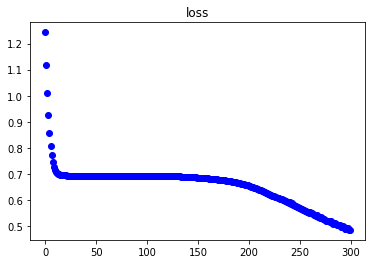

In [19]:
p = np.arange(300)
plt.scatter(p, y, c='b', label='loss_data')
#plt.legend()
plt.title('loss')
plt.show()

In [20]:
A1 = np.dot(x,W1) +B1
Z1 = relu(A1)#一層目活性化関数かける


A2 = np.dot(Z1,W2)+B2
Z22 = sigmoid(A2)

delta = Z2 - target#誤差
#print(delta)
print(Z22)


[[0.59095274]
 [0.6621583 ]
 [0.64012503]
 [0.16998164]]
